Suppose you have a detection algorithm to detect an existence of certain event exists in an item in a stream of
items. The algorithm can be tuned with a threshold value th = [0 1] - the lower the threshold, the more
prone is the algorithm to choose 'event detected'. If the threshold is set to 0, all the items are classifies
as 'even detected'. On the other hand, if the threshold is set to 1, all the items are left undetected. The
stream of likelihood-values of a certain event within a stream of measurements is given in **PRdata.mat**.

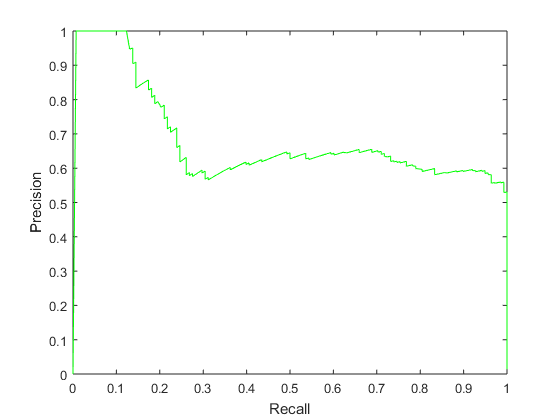

In [1]:
clear all; close all;
load PRdata.mat

TrueIdxs = zeros(size(L));
TrueIdxs(TrueInds) = 1;
th = 0:0.001:1;
PRE = zeros(size(th));
REC = zeros(size(th));

for i=1:length(th)
    eventdetected = L > th(i);
    PRE(i)= sum(eventdetected & TrueIdxs)/sum(eventdetected);
    REC(i) = sum(eventdetected & TrueIdxs)/sum(TrueIdxs);
end

PRE(isnan(PRE)) = 0;
REC(isnan(REC)) = 0;
figure('Name','Precision-Recall Curve','NumberTitle','off');
plot(REC,PRE,'g'); xlabel('Recall'), ylabel('Precision')